# Trees - A fast introduction

A tree is an abstract model of a hierarchical structure. It consists of nodes with a parent-child relationship. Its name comes from the fact that when drawn, it resembles an upside-down tree: the root of the tree is at the top and the leaves are at the bottom.

A tree is a recursive data structure; each node of the tree contains a label value and a list of branches, each of which are also trees. The label can be any data type, while the branches are represented as a list of trees. The lecture slides provide a good overview of tree terminology and a visual to help demonstrate.

## Definitions

* `Node`
A node is a fundamental part of a tree. It can have a name, which we call the “key.” A node may also have additional information. We call this additional information the “payload.” While the payload information is not central to many tree algorithms, it is often critical in applications that make use of trees.

* `Edge`
An edge is another fundamental part of a tree. An edge connects two nodes to show that there is a relationship between them. Every node (except the root) is connected by exactly one incoming edge from another node. Each node may have several outgoing edges.

* `Root`
The root of the tree is the only node in the tree that has no incoming edges. 

* `Path`
A path is an ordered list of nodes that are connected by edges. For example, Mammal → Carnivora → Felidae → Felis → Domestica is a path.

* `Children`
The set of nodes c that have incoming edges from the same node to are said to be the children of that node. In Figure Figure 2, nodes log/, spool/, and yp/ are the children of node var/.

* `Parent`
A node is the parent of all the nodes it connects to with outgoing edges. In Figure 2 the node var/ is the parent of nodes log/, spool/, and yp/.

* `Sibling`
Nodes in the tree that are children of the same parent are said to be siblings. The nodes etc/ and usr/ are siblings in the filesystem tree.

* `Subtree`
A subtree is a set of nodes and edges comprised of a parent and all the descendants of that parent.

* `Leaf Node`
A leaf node is a node that has no children. For example, Human and Chimpanzee are leaf nodes in Figure 1.

* `Level`
The level of a node n is the number of edges on the path from the root node to n. For example, the level of the Felis node in Figure 1 is five. By definition, the level of the root node is zero.

* `Height`
The height of a tree is equal to the maximum level of any node in the tree. The height of the tree in Figure 2 is two.

In [13]:

def tree(root_label, branches=[]):
  ''' This is a simple tree implementation that allows for an arbitrary number of
  children for any node'''
  for branch in branches:
      assert is_tree(branch), 'branches must be trees'
  return [root_label] + list(branches)
def label(tree):
    return tree[0]
def branches(tree):
    return tree[1:]
def is_tree(tree):
    if type(tree) != list or len(tree) < 1:
        return False
    for branch in branches(tree):
        if not is_tree(branch):
            return False
    return True 



In [14]:
t = tree(1, [tree(2), tree(3, [tree(4), tree(5)])])

Below is some lifted code to visualize the above tree. Credit to Allen Downey.

In [3]:
try:
    import EoN
except ImportError:
    !pip install EoN

import networkx as nx

def add_edges(parent, G):
    """Make a NetworkX graph that represents the tree."""
    if parent is None:
        return
    
    for child in branches(parent):
        if child:
            G.add_edge(parent[0], child[0])
            add_edges(child, G)
def get_labels(parent, labels):
    if parent is None:
        return
    
    if parent[0] == '\0':
        labels[parent] = parent.count
    else:
        labels[parent] = parent.letter
        
    get_labels(parent.left, labels)
    get_labels(parent.right, labels)

In [4]:
G = nx.DiGraph()
add_edges(t, G)

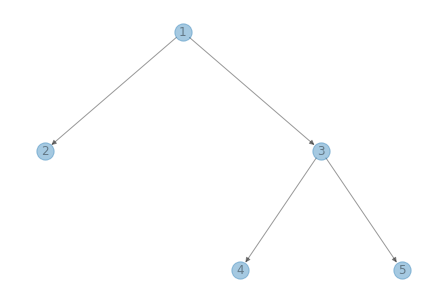

In [5]:
from EoN import hierarchy_pos

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree, G)
    pos = hierarchy_pos(G)
    labels = {1:1,2:2,3:3,4:4,5:5}
    # get_labels(tree, labels)
    nx.draw(G, pos, labels=labels, alpha=0.4)

draw_tree(t)

## Tree traversal  
This is the question of how to visit each of the nodes in a tree **exactly once.**
1. Visit current node and **process node** check if node is a leaf or some other stopping condition. 
2. Iterate across branches and recurse down. 
  Often you can use `for ` loop or `list` comprehensions for branch iterations and recursion to go down.
3. Combination of  recursive call returns are used to determine the final result of your probelm. ***ex: find sum of all labels in a tree -- it is not sufficient to just use recursive call, but must also process the label values***. 

The above functions are okay, but we can place all of the abstraction into a class. This allows for easy passage of data and storage. It will be a proper *ADT* in the eyes of *the Greater Will*.


In [15]:
class Tree: 
  def __init__(s, label, branches= []):
    s.label = label
    s.branches = branches
  def is_leaf(s):
    return not s.branches

Following are several examples which you need to solve in class. 

In [17]:
def count_leaves(t):
  '''Write a function that counts the number of leaves in a given Tree t'''
  if t.is_leaf():
    return 1
  else:
    leaves_below = 0
    for b in t.branches:
      leaves_below += count_leaves(b)
    return leaves_below



In [19]:
t = Tree(1, [Tree(2), Tree(3, [Tree(4), Tree(5)])])
print(count_leaves(t))

3


In [21]:
def list_of_leaves(t):
  '''Returns a list of leaves of a tree '''
  if t.is_leaf():
    return [t.label]
  else:
    leaf_labels = [list_of_leaves(b) for b in t.branches]
    return sum(leaf_labels, [])
#HINT:
sum([ [1], [2, [3]]],[])

[1, 2, [3]]

In [22]:
list_of_leaves(t) == [2,4,5]

True

In [23]:
def fib_tree(n):
    if n == 0 or n == 1:
      return Tree(1)
    else:
      return Tree(fib_tree(n-1))

In [26]:
fib = fib_tree(5)
# Fix the labeling system that is hardcoded above to dynamically given level
# labels to this tree so it can be plotted - get_labels(t)

In [ ]:
def counting_paths(t, total):
  '''Count the # of paths from root to any node in the tree for which the labels
  sum up to the total'''
  if t.label == total: 
    found = 1
  else:
    found = 0
  
  other_findings = 0
  for b in t.branches:
    other_findings += counting_paths(b, total - t.label)
  return found + other_findings

In [ ]:
def tripler(t):
  ''' Triple the value of the labels of each node in the tree'''
  t.label *= 3
  if t.is_leaf():
    return 
  else:
    for b in t.branches:
      tripler(b)

In [27]:
def preorder(t):
    print(t.label)
    for b in t.branches:
        preorder(b)

In [28]:
t = Tree(1, [tree(2), tree(3, [tree(4), tree(5)])])
preorder(t)

1


AttributeError: 'list' object has no attribute 'label'

In [ ]:
class Bin_Tree:
    def __init__(self, label, left=None, right=None):
        self.label = label
        self.right = right
        self.left = left
    def is_leaf(self):
        return not self.right and self.left

In [ ]:
bt = Bin_Tree(1, Bin_Tree(2), Bin_Tree(3, Bin_Tree(4, 5)))